# Setting up libraries and initial data cleaning

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
!head -n 1 data.csv

Q1A	Q1I	Q1E	Q2A	Q2I	Q2E	Q3A	Q3I	Q3E	Q4A	Q4I	Q4E	Q5A	Q5I	Q5E	Q6A	Q6I	Q6E	Q7A	Q7I	Q7E	Q8A	Q8I	Q8E	Q9A	Q9I	Q9E	Q10A	Q10I	Q10E	Q11A	Q11I	Q11E	Q12A	Q12I	Q12E	Q13A	Q13I	Q13E	Q14A	Q14I	Q14E	Q15A	Q15I	Q15E	Q16A	Q16I	Q16E	Q17A	Q17I	Q17E	Q18A	Q18I	Q18E	Q19A	Q19I	Q19E	Q20A	Q20I	Q20E	Q21A	Q21I	Q21E	Q22A	Q22I	Q22E	Q23A	Q23I	Q23E	Q24A	Q24I	Q24E	Q25A	Q25I	Q25E	Q26A	Q26I	Q26E	Q27A	Q27I	Q27E	Q28A	Q28I	Q28E	Q29A	Q29I	Q29E	Q30A	Q30I	Q30E	Q31A	Q31I	Q31E	Q32A	Q32I	Q32E	Q33A	Q33I	Q33E	Q34A	Q34I	Q34E	Q35A	Q35I	Q35E	Q36A	Q36I	Q36E	Q37A	Q37I	Q37E	Q38A	Q38I	Q38E	Q39A	Q39I	Q39E	Q40A	Q40I	Q40E	Q41A	Q41I	Q41E	Q42A	Q42I	Q42E	country	source	introelapse	testelapse	surveyelapse	TIPI1	TIPI2	TIPI3	TIPI4	TIPI5	TIPI6	TIPI7	TIPI8	TIPI9	TIPI10	VCL1	VCL2	VCL3	VCL4	VCL5	VCL6	VCL7	VCL8	VCL9	VCL10	VCL11	VCL12	VCL13	VCL14	VCL15	VCL16	education	urban	gender	engnat	age	screensize	uniquenetworklocation	hand	religion	orientation	race	voted	married	familysize	major


http://www2.psy.unsw.edu.au/dass/

In [134]:
df = pd.read_csv('data.csv', delimiter='\t')

In [45]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Data columns (total 172 columns):
 #    Column                 Dtype 
---   ------                 ----- 
 0    Q1A                    int64 
 1    Q1I                    int64 
 2    Q1E                    int64 
 3    Q2A                    int64 
 4    Q2I                    int64 
 5    Q2E                    int64 
 6    Q3A                    int64 
 7    Q3I                    int64 
 8    Q3E                    int64 
 9    Q4A                    int64 
 10   Q4I                    int64 
 11   Q4E                    int64 
 12   Q5A                    int64 
 13   Q5I                    int64 
 14   Q5E                    int64 
 15   Q6A                    int64 
 16   Q6I                    int64 
 17   Q6E                    int64 
 18   Q7A                    int64 
 19   Q7I                    int64 
 20   Q7E                    int64 
 21   Q8A                    int64 
 22   Q8I                 

In [31]:
np.unique(df.isna(), return_counts=True)

(array([False,  True]), array([6829895,   11405]))

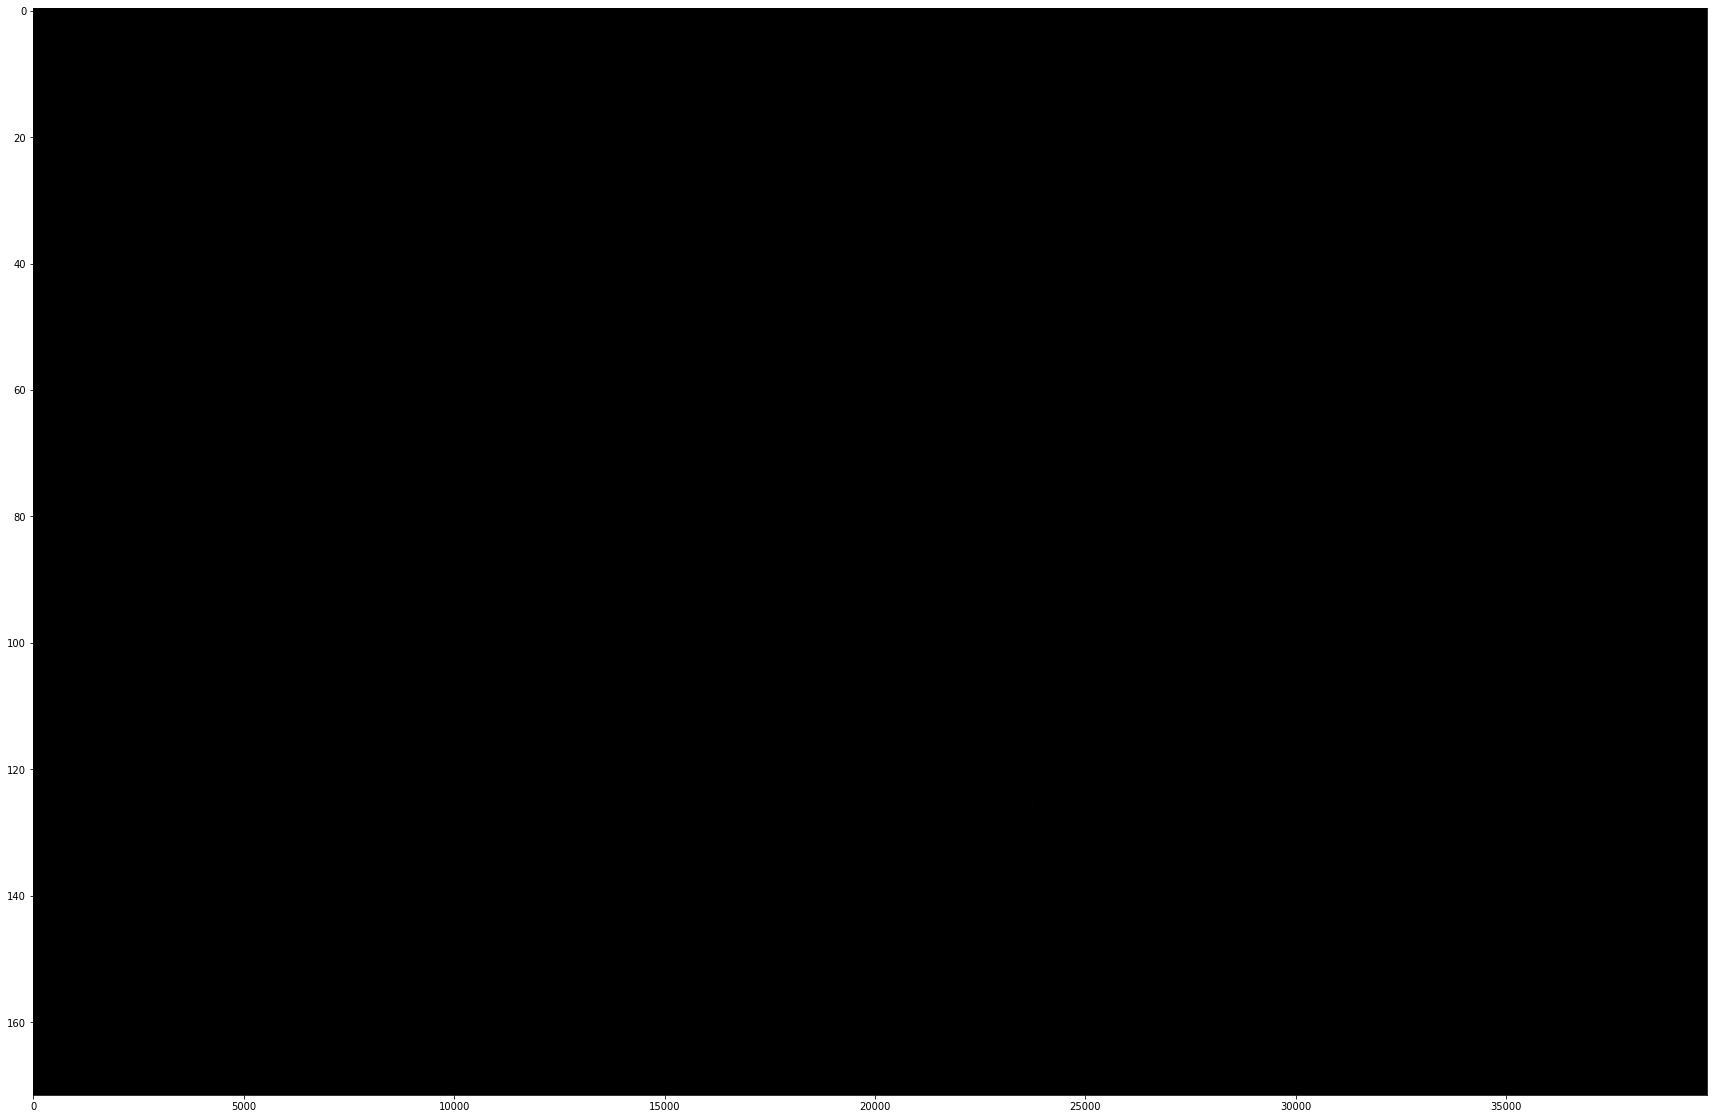

In [65]:
plt.figure(figsize=(30, 20))
plt.imshow(df.isna().T,cmap='gist_heat', aspect='auto')

In [145]:
df['major'].fillna('None', inplace=True)

In [70]:
np.unique(np.unique(df['major'], return_counts=True)[1])

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    53,    54,    57,    58,    59,    65,
          66,    68,    69,    71,    72,    73,    74,    75,    76,
          77,    79,    81,    82,    96,    98,   101,   102,   105,
         106,   117,   122,   133,   135,   137,   143,   156,   157,
         159,   163,   164,   166,   167,   169,   179,   184,   186,
         188,   195,   202,   204,   208,   214,   261,   275,   276,
         312,   316,   320,   348,   524,   580,   582,   607,   621,
         850,  1026, 11425])

In [79]:
q_answers = df[df.columns[0:126:3]]

<AxesSubplot:>

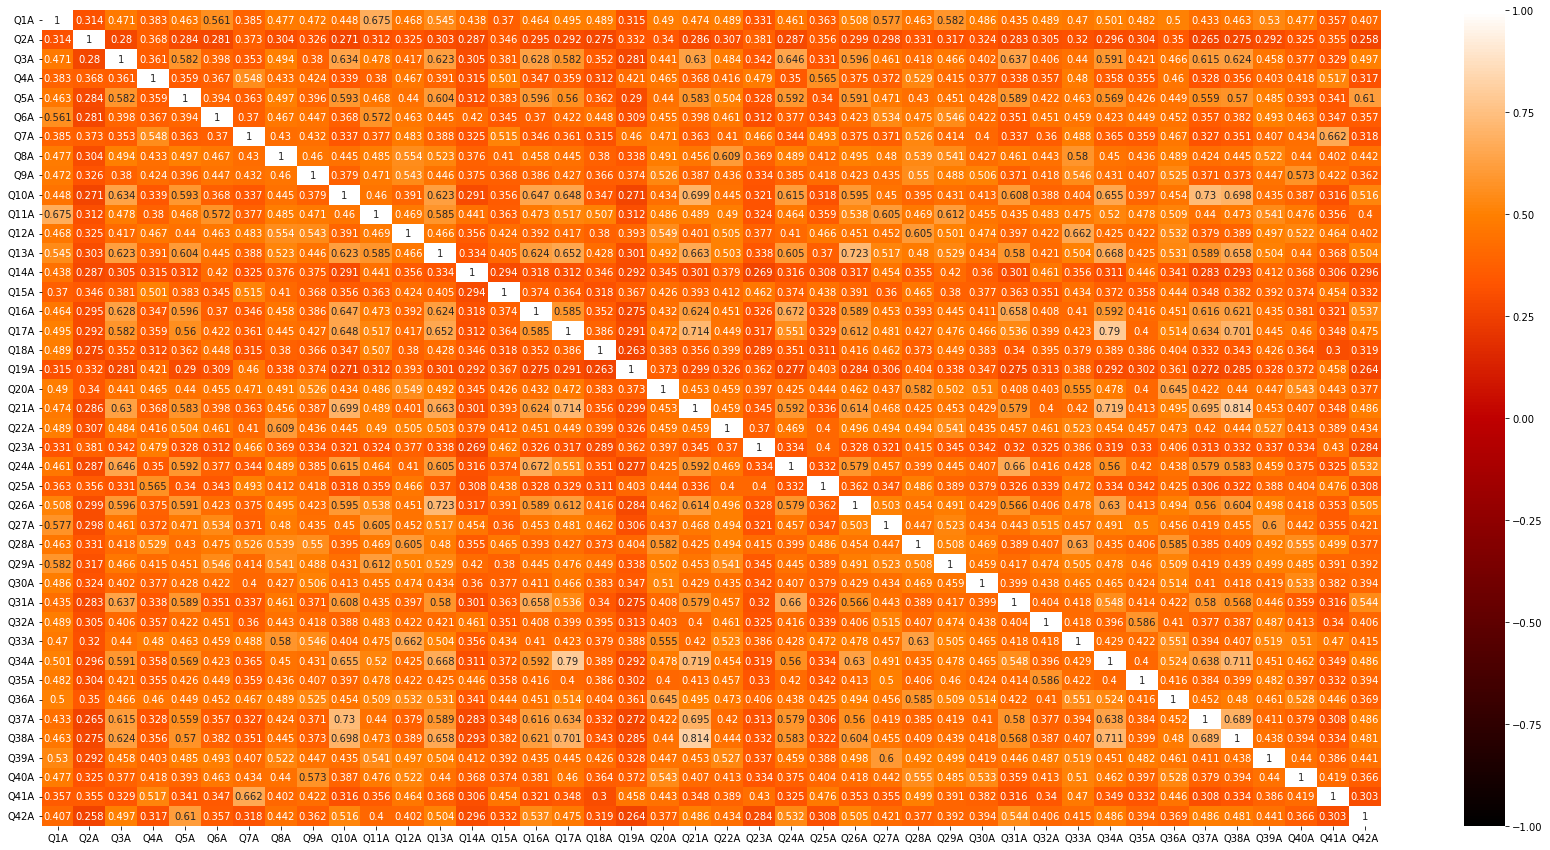

In [78]:
plt.figure(figsize=(30,15))
sns.heatmap(q_answers.corr(), 
            cmap='gist_heat', 
            annot=True,
            xticklabels=True,
            vmin=-1.,
           fmt='.3g')

https://neurocogsystem.com/wp-content/uploads/2021/02/DASS-42-Scoring.pdf

In [90]:
depr = [2, 4, 9, 12, 15, 16, 20, 23, 25, 30, 33, 36, 37, 41]
anx = [1, 3, 6, 8, 14, 18, 19, 22, 24, 27, 29, 35, 39, 40]
strss = [0, 5, 7, 10, 11, 13, 17, 21, 26, 28, 31, 32, 34, 38]

<AxesSubplot:>

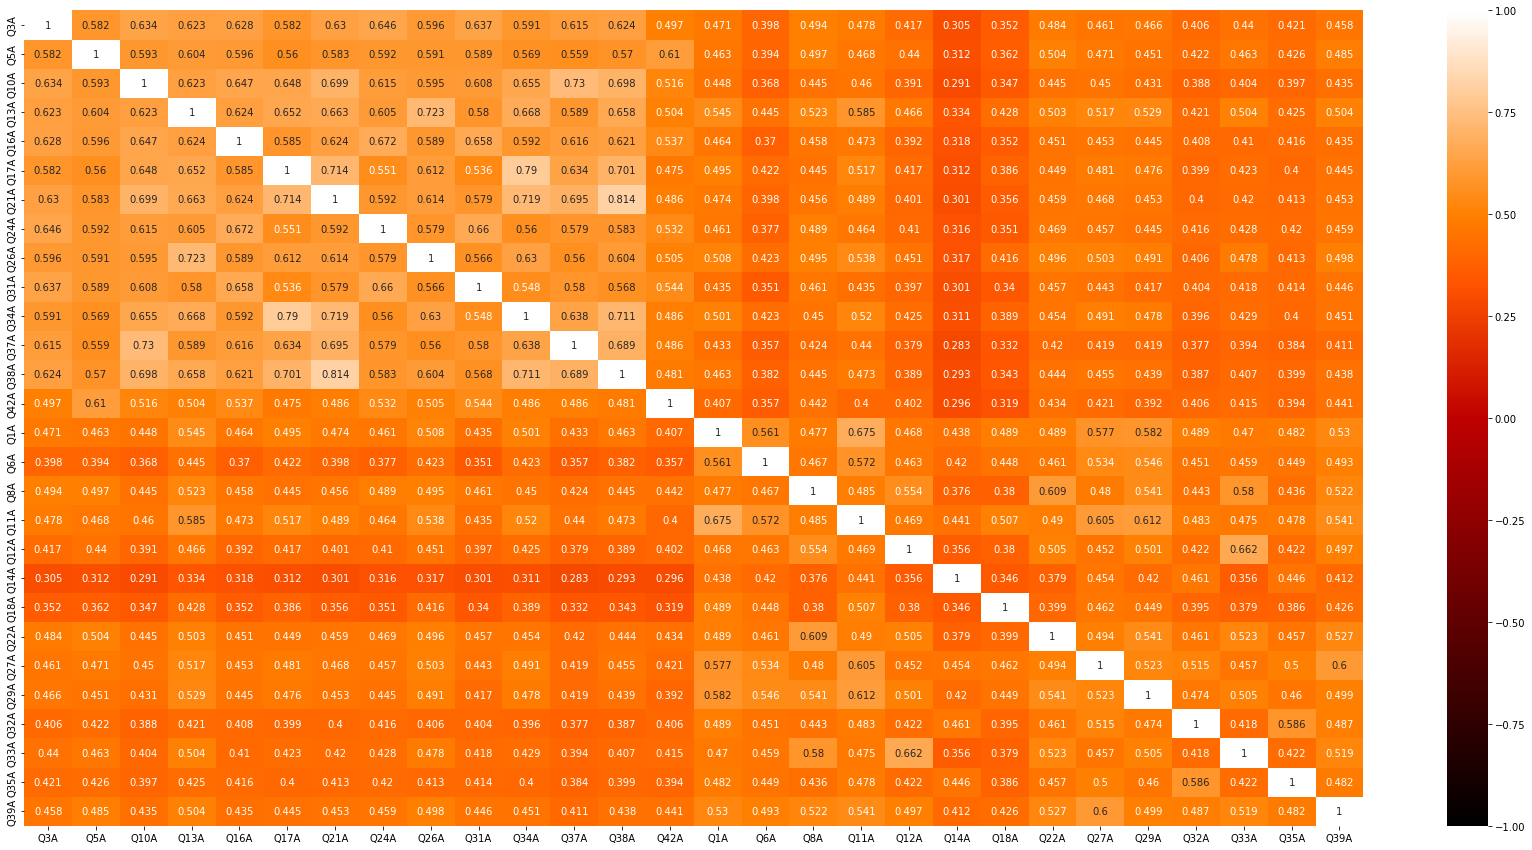

In [112]:
plt.figure(figsize=(30,15))
sns.heatmap(q_answers[q_answers.columns[depr + strss]].corr(), 
            cmap='gist_heat', 
            annot=True,
            xticklabels=True,
            vmin=-1.,
           fmt='.3g')

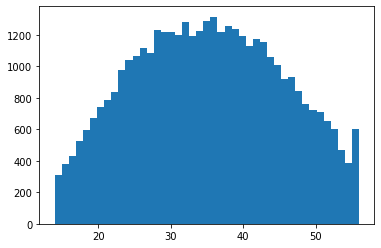

In [105]:
_ = plt.hist(np.sum(q_answers[q_answers.columns[strss]], axis=1), bins=43)

## Idea - calculate DASS scores and then check how do they relate to the features as in age, sex, education etc...

In [140]:
LVL_S = np.sum(q_answers[q_answers.columns[strss]], axis=1)
LVL_A = np.sum(q_answers[q_answers.columns[anx]], axis=1)
LVL_D = np.sum(q_answers[q_answers.columns[depr]], axis=1)
LVL_S.name = "LVL_S"
LVL_A.name = "LVL_A"
LVL_D.name = "LVL_D"

0        54
1        41
2        31
3        30
4        43
         ..
39770    29
39771    48
39772    19
39773    47
39774    30
Length: 39775, dtype: int64

In [144]:
#plt.figure(figsize=(16,9))
df = df.join(LVL_S).join(LVL_A).join(LVL_D)

In [146]:
df

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,religion,orientation,race,voted,married,familysize,major,LVL_S,LVL_A,LVL_D
0,4,28,3890,4,25,2122,2,16,1944,4,...,12,1,10,2,1,2,None,54,48,41
1,4,2,8118,1,36,2890,2,35,4777,3,...,7,0,70,2,1,4,None,41,31,38
2,3,7,5784,1,33,4373,4,41,3242,1,...,4,3,60,1,1,3,None,31,26,53
3,2,23,5081,3,11,6837,2,37,5521,1,...,4,5,70,2,1,5,biology,30,31,30
4,2,36,3215,2,13,7731,3,5,4156,4,...,10,1,10,2,1,4,Psychology,43,54,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,31,3287,1,5,2216,3,29,3895,2,...,2,4,60,2,1,2,None,29,26,50
39771,3,14,4792,4,41,2604,3,15,2668,4,...,10,0,10,2,1,4,Mathematic,48,48,52
39772,2,1,25147,1,4,4555,2,14,3388,1,...,7,1,30,1,2,3,Computer Science,19,15,18
39773,3,36,4286,1,34,2736,2,10,5968,2,...,6,1,60,1,1,2,History,47,27,30
